<a href="https://colab.research.google.com/github/sudhamsalagar123/Data-Science-Internship-Project/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.6 MB/s eta 0:00:00


In [ ]:
import pulp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("MANUFACTURING OPTIMIZATION PROJECT")
print("ABC Electronics - Production Planning")
print("=" * 60)


MANUFACTURING OPTIMIZATION PROJECT
ABC Electronics - Production Planning


## Problem Description
"""
ABC Electronics manufactures three products: Smartphones, Tablets, and Laptops.
The company wants to maximize profit while considering:
- Limited raw materials
- Production capacity constraints
- Labor availability
- Market demand limits
- Storage capacity

OBJECTIVE: Maximize total profit from production
"""

In [ ]:
# Define problem parameters
print("\n1. PROBLEM SETUP")
print("-" * 30)

# Products
products = ['Smartphone', 'Tablet', 'Laptop']



1. PROBLEM SETUP
------------------------------


In [ ]:
# Profit per unit (in dollars)
profit = {
    'Smartphone': 150,
    'Tablet': 200,
    'Laptop': 400
}

In [ ]:
# Resource requirements per unit
# [Material (kg), Labor (hours), Storage (cubic feet)]
resource_req = {
    'Smartphone': [2, 3, 1],
    'Tablet': [3, 4, 2],
    'Laptop': [5, 6, 3]
}

In [ ]:
# Available resources
available_resources = {
    'Material': 1000,  # kg
    'Labor': 1500,     # hours
    'Storage': 800     # cubic feet
}

In [ ]:
# Market demand limits (maximum units that can be sold)
demand_limits = {
    'Smartphone': 200,
    'Tablet': 150,
    'Laptop': 100
}

In [ ]:
# Display problem parameters
print("Product Profit per Unit:")
for product in products:
    print(f"  {product}: ${profit[product]}")

Product Profit per Unit:
  Smartphone: $150
  Tablet: $200
  Laptop: $400


In [ ]:
print("\nResource Requirements per Unit:")
print("Product\t\tMaterial(kg)\tLabor(hrs)\tStorage(ft³)")
for product in products:
    req = resource_req[product]
    print(f"{product}\t{req[0]}\t\t{req[1]}\t\t{req[2]}")

print("\nAvailable Resources:")
for resource, amount in available_resources.items():
    print(f"  {resource}: {amount}")

print("\nMarket Demand Limits:")
for product, limit in demand_limits.items():
    print(f"  {product}: {limit} units")



Resource Requirements per Unit:
Product		Material(kg)	Labor(hrs)	Storage(ft³)
Smartphone	2		3		1
Tablet	3		4		2
Laptop	5		6		3

Available Resources:
  Material: 1000
  Labor: 1500
  Storage: 800

Market Demand Limits:
  Smartphone: 200 units
  Tablet: 150 units
  Laptop: 100 units


In [ ]:
## 2. Mathematical Model Formulation
print("\n\n2. MATHEMATICAL MODEL")
print("-" * 30)

print("Decision Variables:")
print("  x1 = Number of Smartphones to produce")
print("  x2 = Number of Tablets to produce")
print("  x3 = Number of Laptops to produce")

print("\nObjective Function:")
print("  Maximize: 150*x1 + 200*x2 + 400*x3")

print("\nConstraints:")
print("  Material: 2*x1 + 3*x2 + 5*x3 ≤ 1000")
print("  Labor:    3*x1 + 4*x2 + 6*x3 ≤ 1500")
print("  Storage:  1*x1 + 2*x2 + 3*x3 ≤ 800")
print("  Demand:   x1 ≤ 200, x2 ≤ 150, x3 ≤ 100")
print("  Non-negativity: x1, x2, x3 ≥ 0")




2. MATHEMATICAL MODEL
------------------------------
Decision Variables:
  x1 = Number of Smartphones to produce
  x2 = Number of Tablets to produce
  x3 = Number of Laptops to produce

Objective Function:
  Maximize: 150*x1 + 200*x2 + 400*x3

Constraints:
  Material: 2*x1 + 3*x2 + 5*x3 ≤ 1000
  Labor:    3*x1 + 4*x2 + 6*x3 ≤ 1500
  Storage:  1*x1 + 2*x2 + 3*x3 ≤ 800
  Demand:   x1 ≤ 200, x2 ≤ 150, x3 ≤ 100
  Non-negativity: x1, x2, x3 ≥ 0


In [ ]:
## 3. Solve using PuLP
print("\n\n3. SOLVING THE OPTIMIZATION PROBLEM")
print("-" * 40)



3. SOLVING THE OPTIMIZATION PROBLEM
----------------------------------------


In [ ]:
# Create the problem
prob = pulp.LpProblem("Manufacturing_Optimization", pulp.LpMaximize)

In [ ]:
# Decision variables
x = {}
for product in products:
    x[product] = pulp.LpVariable(f"x_{product}", lowBound=0, cat='Integer')

In [ ]:
# Objective function
prob += sum(profit[product] * x[product] for product in products), "Total_Profit"

In [ ]:
# Resource constraints
resource_names = ['Material', 'Labor', 'Storage']
for i, resource in enumerate(resource_names):
    constraint = sum(resource_req[product][i] * x[product] for product in products)
    prob += constraint <= available_resources[resource], f"{resource}_Constraint"

In [ ]:
# Demand constraints
for product in products:
    prob += x[product] <= demand_limits[product], f"Demand_{product}"

In [ ]:
# Display the problem
print("Linear Programming Problem Formulated:")
print(prob)

Linear Programming Problem Formulated:
Manufacturing_Optimization:
MAXIMIZE
400*x_Laptop + 150*x_Smartphone + 200*x_Tablet + 0
SUBJECT TO
Material_Constraint: 5 x_Laptop + 2 x_Smartphone + 3 x_Tablet <= 1000

Labor_Constraint: 6 x_Laptop + 3 x_Smartphone + 4 x_Tablet <= 1500

Storage_Constraint: 3 x_Laptop + x_Smartphone + 2 x_Tablet <= 800

Demand_Smartphone: x_Smartphone <= 200

Demand_Tablet: x_Tablet <= 150

Demand_Laptop: x_Laptop <= 100

VARIABLES
0 <= x_Laptop Integer
0 <= x_Smartphone Integer
0 <= x_Tablet Integer



In [ ]:
# Solve the problem
print("\nSolving the problem...")
prob.solve(pulp.PULP_CBC_CMD(msg=0))


Solving the problem...


1

In [ ]:
# Check solution status
status = pulp.LpStatus[prob.status]
print(f"Solution Status: {status}")

Solution Status: Optimal


In [ ]:
## 4. Results Analysis
print("\n\n4. OPTIMAL SOLUTION")
print("-" * 30)



4. OPTIMAL SOLUTION
------------------------------


In [ ]:
if status == 'Optimal':
    # Extract solution
    solution = {}
    for product in products:
        solution[product] = int(x[product].varValue)

    print("Optimal Production Plan:")
    total_profit = 0
    for product in products:
        units = solution[product]
        product_profit = units * profit[product]
        total_profit += product_profit
        print(f"  {product}: {units} units (Profit: ${product_profit:,})")

    print(f"\nMaximum Total Profit: ${total_profit:,}")

    # Resource utilization analysis
    print("\n\nRESOURCE UTILIZATION ANALYSIS")
    print("-" * 35)

    resource_usage = {}
    utilization_rates = {}
    for i, resource in enumerate(resource_names):
        used = sum(resource_req[product][i] * solution[product] for product in products)
        available = available_resources[resource]
        utilization = (used / available) * 100

        resource_usage[resource] = used
        utilization_rates[resource] = utilization

        print(f"{resource}:")
        print(f"  Used: {used} / {available} ({utilization:.1f}%)")
        print(f"  Remaining: {available - used}")
        print()

    # Market demand analysis
    print("MARKET DEMAND ANALYSIS")
    print("-" * 25)

    for product in products:
        produced = solution[product]
        max_demand = demand_limits[product]
        demand_fulfillment = (produced / max_demand) * 100
        print(f"{product}:")
        print(f"  Produced: {produced} / {max_demand} units ({demand_fulfillment:.1f}%)")
        print(f"  Unused demand: {max_demand - produced} units")
        print()

else:
    print("No optimal solution found!")
    solution = None


Optimal Production Plan:
  Smartphone: 199 units (Profit: $29,850)
  Tablet: 34 units (Profit: $6,800)
  Laptop: 100 units (Profit: $40,000)

Maximum Total Profit: $76,650


RESOURCE UTILIZATION ANALYSIS
-----------------------------------
Material:
  Used: 1000 / 1000 (100.0%)
  Remaining: 0

Labor:
  Used: 1333 / 1500 (88.9%)
  Remaining: 167

Storage:
  Used: 567 / 800 (70.9%)
  Remaining: 233

MARKET DEMAND ANALYSIS
-------------------------
Smartphone:
  Produced: 199 / 200 units (99.5%)
  Unused demand: 1 units

Tablet:
  Produced: 34 / 150 units (22.7%)
  Unused demand: 116 units

Laptop:
  Produced: 100 / 100 units (100.0%)
  Unused demand: 0 units



In [ ]:
## 5. Sensitivity Analysis
print("\n\n5. SENSITIVITY ANALYSIS")
print("-" * 30)



5. SENSITIVITY ANALYSIS
------------------------------


In [ ]:
if solution:
    # Analyze impact of changing resource availability
    print("Impact of Increasing Resources by 10%:")

    sensitivity_results = []

    for resource in resource_names:
        # Create new problem with increased resource
        prob_sens = pulp.LpProblem("Sensitivity_Analysis", pulp.LpMaximize)

        # Same variables
        x_sens = {}
        for product in products:
            x_sens[product] = pulp.LpVariable(f"x_{product}_sens", lowBound=0, cat='Integer')

        # Same objective
        prob_sens += sum(profit[product] * x_sens[product] for product in products)

        # Modified constraints
        for i, res in enumerate(resource_names):
            constraint = sum(resource_req[product][i] * x_sens[product] for product in products)
            if res == resource:
                # Increase this resource by 10%
                prob_sens += constraint <= available_resources[res] * 1.1
            else:
                prob_sens += constraint <= available_resources[res]

        # Demand constraints
        for product in products:
            prob_sens += x_sens[product] <= demand_limits[product]

        # Solve
        prob_sens.solve(pulp.PULP_CBC_CMD(msg=0))

        if pulp.LpStatus[prob_sens.status] == 'Optimal':
            new_profit = pulp.value(prob_sens.objective)
            profit_increase = new_profit - total_profit
            sensitivity_results.append({
                'Resource': resource,
                'Original_Profit': total_profit,
                'New_Profit': new_profit,
                'Profit_Increase': profit_increase,
                'Percentage_Increase': (profit_increase / total_profit) * 100
            })

            print(f"  {resource}: +${profit_increase:,.0f} ({(profit_increase/total_profit)*100:.2f}%)")

Impact of Increasing Resources by 10%:
  Material: +$6,650 (8.68%)
  Labor: +$0 (0.00%)
  Storage: +$0 (0.00%)


In [ ]:
## 6. Visualization
print("\n\n6. CREATING VISUALIZATIONS")
print("-" * 35)



6. CREATING VISUALIZATIONS
-----------------------------------


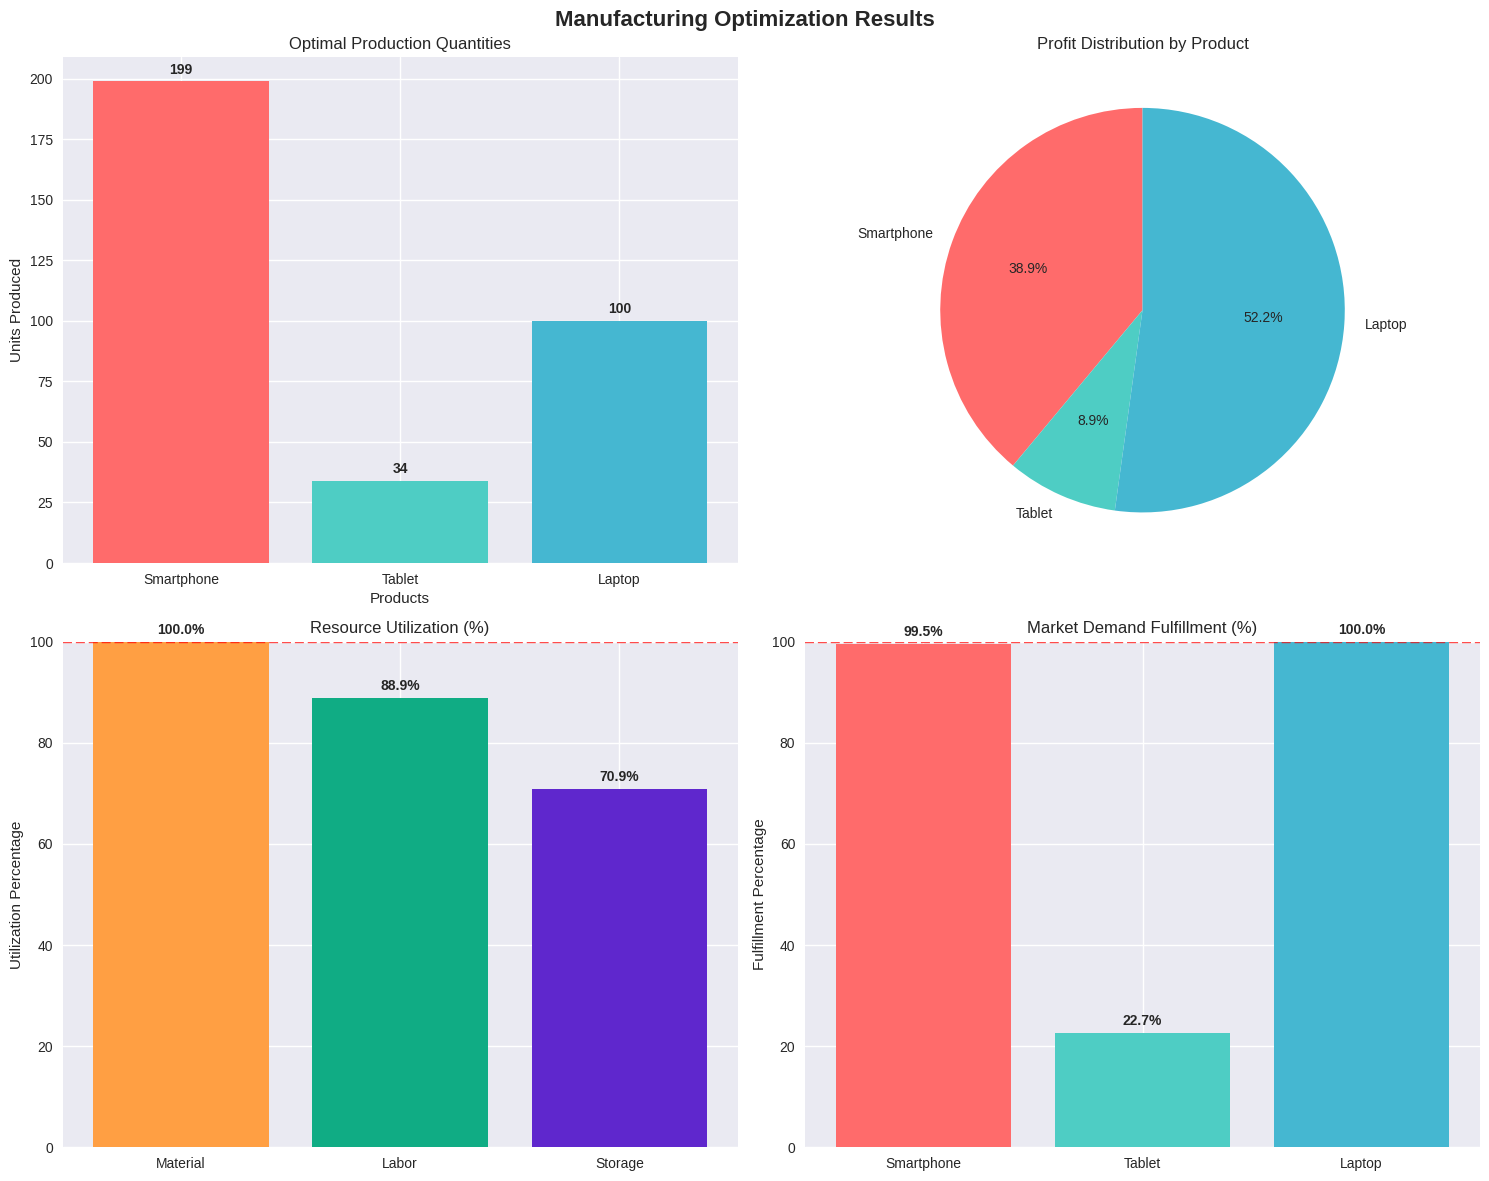

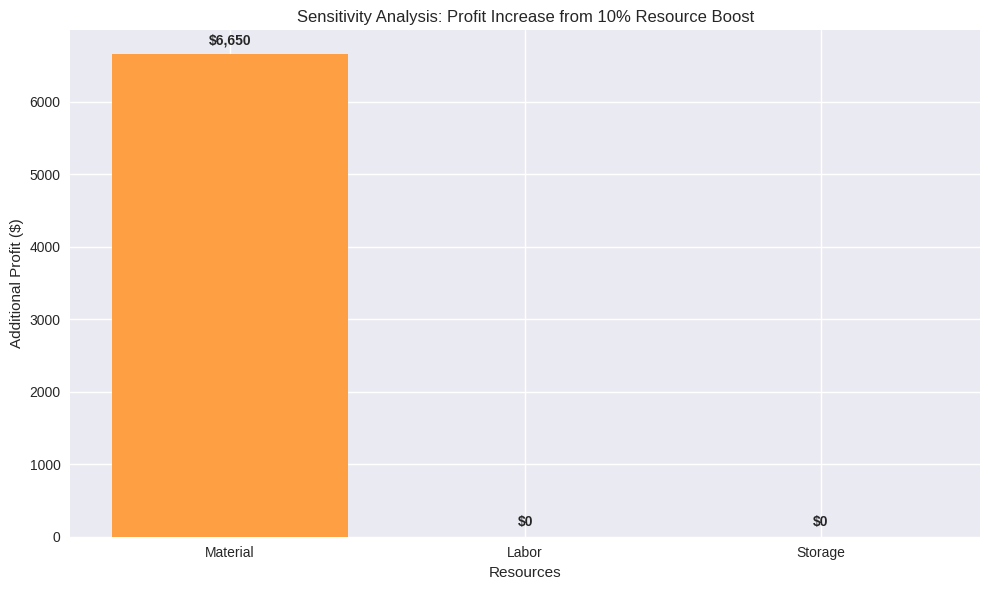

In [ ]:
if solution:
    # Create visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Manufacturing Optimization Results', fontsize=16, fontweight='bold')

    # 1. Production quantities
    ax1.bar(products, [solution[p] for p in products], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax1.set_title('Optimal Production Quantities')
    ax1.set_ylabel('Units Produced')
    ax1.set_xlabel('Products')
    for i, product in enumerate(products):
        ax1.text(i, solution[product] + 2, str(solution[product]),
                ha='center', va='bottom', fontweight='bold')

    # 2. Profit breakdown
    profits = [solution[p] * profit[p] for p in products]
    ax2.pie(profits, labels=products, autopct='%1.1f%%', startangle=90,
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax2.set_title('Profit Distribution by Product')

    # 3. Resource utilization
    resources = list(resource_usage.keys())
    utilization = [utilization_rates[r] for r in resources]
    bars = ax3.bar(resources, utilization, color=['#FF9F43', '#10AC84', '#5F27CD'])
    ax3.set_title('Resource Utilization (%)')
    ax3.set_ylabel('Utilization Percentage')
    ax3.set_ylim(0, 100)
    ax3.axhline(y=100, color='red', linestyle='--', alpha=0.7)
    for bar, util in zip(bars, utilization):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{util:.1f}%', ha='center', va='bottom', fontweight='bold')

    # 4. Demand fulfillment
    demand_fulfillment = [(solution[p] / demand_limits[p]) * 100 for p in products]
    bars = ax4.bar(products, demand_fulfillment, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax4.set_title('Market Demand Fulfillment (%)')
    ax4.set_ylabel('Fulfillment Percentage')
    ax4.set_ylim(0, 100)
    ax4.axhline(y=100, color='red', linestyle='--', alpha=0.7)
    for bar, fulfill in zip(bars, demand_fulfillment):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{fulfill:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Sensitivity analysis chart
    if sensitivity_results:
        plt.figure(figsize=(10, 6))
        resources_sens = [r['Resource'] for r in sensitivity_results]
        increases = [r['Profit_Increase'] for r in sensitivity_results]

        bars = plt.bar(resources_sens, increases, color=['#FF9F43', '#10AC84', '#5F27CD'])
        plt.title('Sensitivity Analysis: Profit Increase from 10% Resource Boost')
        plt.ylabel('Additional Profit ($)')
        plt.xlabel('Resources')

        for bar, increase in zip(bars, increases):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                    f'${increase:,.0f}', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

In [43]:
## 7. Business Recommendations
print("\n\n7. BUSINESS RECOMMENDATIONS")
print("-" * 35)

if solution:
    print("Based on the optimization results:")
    print()

    # Find bottleneck resource
    max_util_resource = max(utilization_rates.keys(), key=lambda x: utilization_rates[x])
    print(f"1. RESOURCE BOTTLENECK:")
    print(f"   {max_util_resource} is the primary constraint ({utilization_rates[max_util_resource]:.1f}% utilized)")
    print(f"   Consider investing in additional {max_util_resource.lower()} capacity")
    print()

    # Product focus
    profit_per_unit = [(p, profit[p]) for p in products]
    profit_per_unit.sort(key=lambda x: x[1], reverse=True)
    print(f"2. PRODUCT FOCUS:")
    print(f"   Highest margin product: {profit_per_unit[0][0]} (${profit_per_unit[0][1]} per unit)")

    # Check if we're producing at capacity for high-margin products
    high_margin_product = profit_per_unit[0][0]
    if solution[high_margin_product] < demand_limits[high_margin_product]:
        print(f"   Opportunity: Increase {high_margin_product} production if possible")
    print()
    # Sensitivity insights
    if sensitivity_results:
        best_investment = max(sensitivity_results, key=lambda x: x['Profit_Increase'])
        print(f"3. INVESTMENT PRIORITY:")
        print(f"   Best ROI: Expanding {best_investment['Resource']} capacity")
        print(f"   Expected additional profit: ${best_investment['Profit_Increase']:,.0f}")
    print()
    print("4. OPERATIONAL EFFICIENCY:")
    underutilized = [r for r, u in utilization_rates.items() if u < 80]
    if underutilized:
        print(f"   Underutilized resources: {', '.join(underutilized)}")
        print("   Consider reallocating or reducing these resources")

    print("\n" + "="*60)
    print("SUMMARY:")
    print(f"Optimal production plan generates ${total_profit:,} in profit")
    print("Key constraints and opportunities identified for future planning")
    print("="*60)





7. BUSINESS RECOMMENDATIONS
-----------------------------------
Based on the optimization results:

1. RESOURCE BOTTLENECK:
   Material is the primary constraint (100.0% utilized)
   Consider investing in additional material capacity

2. PRODUCT FOCUS:
   Highest margin product: Laptop ($400 per unit)

3. INVESTMENT PRIORITY:
   Best ROI: Expanding Material capacity
   Expected additional profit: $6,650

4. OPERATIONAL EFFICIENCY:
   Underutilized resources: Storage
   Consider reallocating or reducing these resources

SUMMARY:
Optimal production plan generates $76,650 in profit
Key constraints and opportunities identified for future planning


In [44]:
## 8. Export Results
print("\n\n8. EXPORTING RESULTS")
print("-" * 25)

if solution:
    # Create results dataframe
    results_df = pd.DataFrame({
        'Product': products,
        'Optimal_Production': [solution[p] for p in products],
        'Unit_Profit': [profit[p] for p in products],
        'Total_Profit': [solution[p] * profit[p] for p in products],
        'Market_Demand': [demand_limits[p] for p in products],
        'Demand_Fulfillment_%': [(solution[p] / demand_limits[p]) * 100 for p in products]
    })

    print("Production Results Summary:")
    print(results_df.to_string(index=False))

    # Resource utilization dataframe
    resource_df = pd.DataFrame({
        'Resource': resource_names,
        'Available': [available_resources[r] for r in resource_names],
        'Used': [resource_usage[r] for r in resource_names],
        'Utilization_%': [utilization_rates[r] for r in resource_names],
        'Remaining': [available_resources[r] - resource_usage[r] for r in resource_names]
    })

    print("\nResource Utilization Summary:")
    print(resource_df.to_string(index=False))

    print(f"\nResults saved to memory. Total profit: ${total_profit:,}")

print("\n" + "="*60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("Linear Programming optimization solved the manufacturing problem")
print("="*60)



8. EXPORTING RESULTS
-------------------------
Production Results Summary:
   Product  Optimal_Production  Unit_Profit  Total_Profit  Market_Demand  Demand_Fulfillment_%
Smartphone                 199          150         29850            200             99.500000
    Tablet                  34          200          6800            150             22.666667
    Laptop                 100          400         40000            100            100.000000

Resource Utilization Summary:
Resource  Available  Used  Utilization_%  Remaining
Material       1000  1000     100.000000          0
   Labor       1500  1333      88.866667        167
 Storage        800   567      70.875000        233

Results saved to memory. Total profit: $76,650

PROJECT COMPLETED SUCCESSFULLY!
Linear Programming optimization solved the manufacturing problem
